## The Reuters Dataset
Loading the Reuters dataset

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 1s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

## Preparing the data
Encoding the data

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1

    return results

# vectorize training data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
from keras.utils.np_utils import to_categorical

# vectorize training labels
one_hot_train_labels = to_categorical(train_labels)

# vectorize test labels
one_hot_test_labels = to_categorical(test_labels)

## Building your network
Model definition



In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

Compiling the model



In [11]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Validating your approach
Setting aside a validation set

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Training the model

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 47ms/step - loss: 2.5227 - accuracy: 0.5283 - val_loss: 1.6901 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.3779 - accuracy: 0.7055 - val_loss: 1.3025 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 1s 31ms/step - loss: 1.0308 - accuracy: 0.7779 - val_loss: 1.1497 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 30ms/step - loss: 0.8097 - accuracy: 0.8272 - val_loss: 1.0311 - val_accuracy: 0.7940
Epoch 5/20
16/16 [==============================] - 0s 29ms/step - loss: 0.6450 - accuracy: 0.8636 - val_loss: 0.9715 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.5106 - accuracy: 0.8945 - val_loss: 0.9259 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 31ms/step - loss: 0.4116 - accuracy: 0.9151 - val_loss: 0.8935 - val_accuracy: 0.8210
Epoch 8/20
16

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

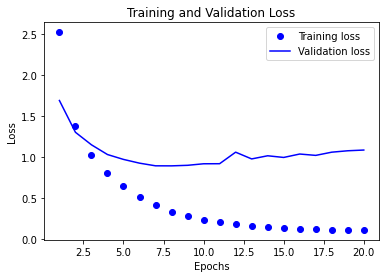

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting the training and validation accuracy

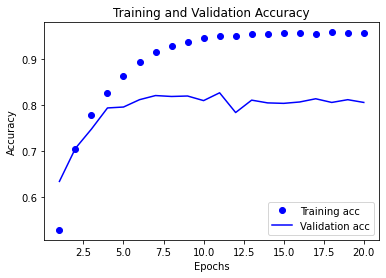

In [17]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Retraining a model from scratch

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 43ms/step - loss: 2.6010 - accuracy: 0.5367 - val_loss: 1.6924 - val_accuracy: 0.6580
Epoch 2/9
16/16 [==============================] - 0s 31ms/step - loss: 1.3880 - accuracy: 0.7115 - val_loss: 1.2747 - val_accuracy: 0.7200
Epoch 3/9
16/16 [==============================] - 1s 34ms/step - loss: 1.0195 - accuracy: 0.7805 - val_loss: 1.1029 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.7904 - accuracy: 0.8322 - val_loss: 1.0354 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 0s 30ms/step - loss: 0.6303 - accuracy: 0.8632 - val_loss: 0.9514 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 1s 32ms/step - loss: 0.5022 - accuracy: 0.8950 - val_loss: 0.9539 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 34ms/step - loss: 0.4033 - accuracy: 0.9147 - val_loss: 0.9355 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===

In [20]:
results

[0.999726414680481, 0.7836152911186218]

Generating predictions

In [21]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [22]:
# each entry in predictions has a vecotry of length 46
predictions[0].shape

(46,)

In [23]:
# The coefficients sum to 1
np.sum(predictions[0])

0.99999994

In [24]:
# The largest entry is the predicted class - class with highest probability
np.argmax(predictions[0])

3